In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [43]:
https://www.tensorflow.org/tutorials/load_data/images
import pathlib
data_dir = pathlib.Path('train/')

In [44]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
print(image_count)

4244


In [49]:
hotdog = list(data_dir.glob('hotdog/*.jpg'))


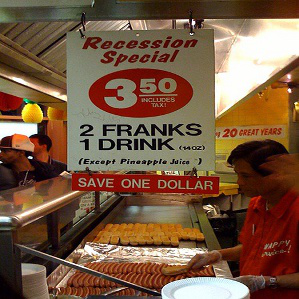

In [51]:
PIL.Image.open(str(hotdog[0]))

In [55]:
image = PIL.Image.open(str(hotdog[0]))
width, height = image.size

print(f"The image size is {width}x{height}")

The image size is 299x299


In [65]:
batch_size = 64
img_height = 150
img_width = 150

train_dogs = tf.keras.utils.image_dataset_from_directory(
    data_dir),
validation_split = 0.3,
subset = 'training',
random_state = 2024,
image_size = (img_height, img_width),
batch_size = batch_size

Found 4244 files belonging to 2 classes.
